# 05 - Unsupervised Learning (Clustering)
Apply K-Means (with elbow method) and Hierarchical Clustering, then compare clusters to labels.


In [5]:
# Change working directory
import os
os.chdir(r'D:\Books and Courses\Machine Learning\Sprints x Microsoft Summer Camp - AI and Machine Learning\Comprehensive Machine Learning Full Pipeline on Heart Disease UCI Dataset (Graduation Project)\Heart_Disease_Project')

c:\Users\w10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\w10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\w10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\w10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

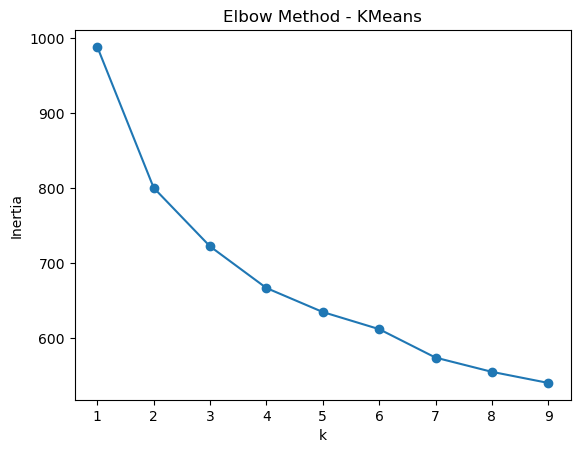

c:\Users\w10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans ARI: 0.3920001696203767
KMeans NMI: 0.3069258323728103


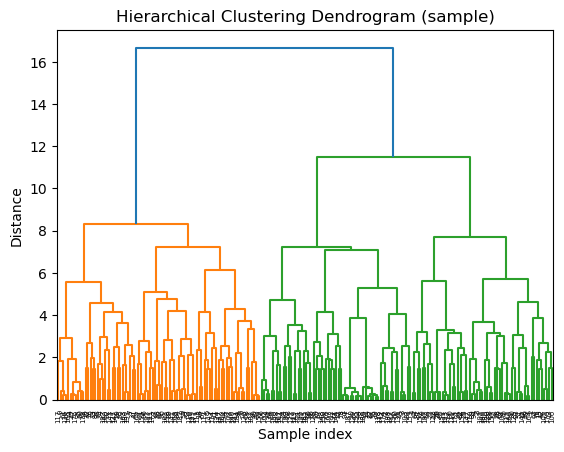

Hierarchical (sample) ARI: 0.34460827047061404
Hierarchical (sample) NMI: 0.2612701450909114


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load preprocessed data  
train_npz = Path('data/cleaned_train.npz')
arr = np.load(train_npz)
X, y = arr['X'], arr['y']

# K-Means elbow
ks = range(1, 10)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(list(ks), inertias, marker='o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Method - KMeans')
plt.show()

# Choose k=2 for binary disease vs non-disease classification 
km = KMeans(n_clusters=2, n_init=10, random_state=42)
labels_km = km.fit_predict(X)
print('KMeans ARI:', adjusted_rand_score(y, labels_km))
print('KMeans NMI:', normalized_mutual_info_score(y, labels_km))

# Hierarchical clustering dendrogram  
Z = linkage(X[:200], method='ward')  # sample for just speed
plt.figure()
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (sample)')
plt.xlabel('Sample index'); plt.ylabel('Distance')
plt.show()

labels_h = fcluster(Z, t=2, criterion='maxclust')
print('Hierarchical (sample) ARI:', adjusted_rand_score(y[:200], labels_h))
print('Hierarchical (sample) NMI:', normalized_mutual_info_score(y[:200], labels_h))


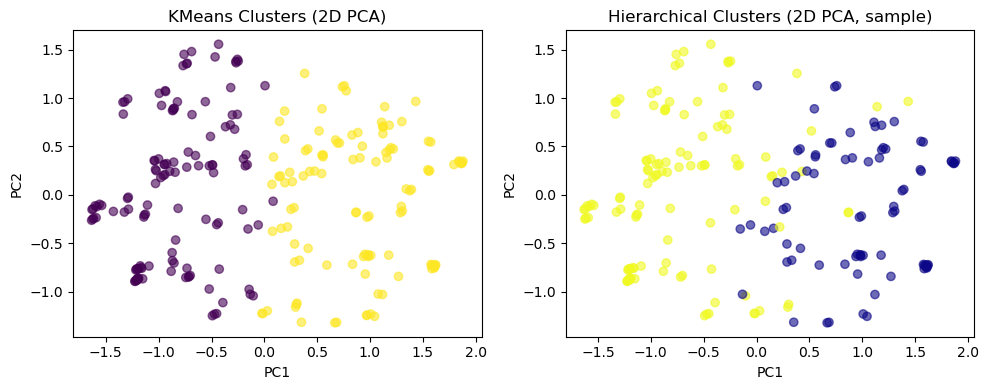

In [ ]:
# PCA for 2D visualization of clusters 

from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)

# --- KMeans visualization ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_km, cmap="viridis", alpha=0.6)
plt.title("KMeans Clusters (2D PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")

# --- Hierarchical visualization (على نفس الـ 200 عينة) ---
plt.subplot(1,2,2)
X_sample_2d = X_2d[:200]
plt.scatter(X_sample_2d[:,0], X_sample_2d[:,1], c=labels_h, cmap="plasma", alpha=0.6)
plt.title("Hierarchical Clusters (2D PCA, sample)")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.tight_layout()
plt.show()


# The dataset does not exhibit clear natural clusters that distinctly separate patients with heart disease from those without it. The unsupervised methods here are still useful to show that the separation between clusters is not strong, likely due to significant overlap between patients and non-patients across certain features.